In [ ]:
!nvidia-smi


Mon Nov 25 09:48:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)


In [ ]:
%cd /content
!git clone https://github.com/ultralytics/ultralytics.git
%cd /content/ultralytics
!pip install -e .
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oU9KufVBEf6Q5HWHEom9")
project = rf.workspace("kenza-0rgn0").project("crosswalk-detection-r4hft")
version = project.version(10)
dataset = version.download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 21.5M/21.5M [00:00<00:00, 264MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/crosswalk-detection-10/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, sp

In [ ]:
!ls {HOME}/runs/detect/train/

ls: cannot access '/content/runs/detect/train/': No such file or directory


In [ ]:
def find_fridge_temperatures(N, intervals):
    if N == 0:
        return 0, 0

    intervals.sort()  # Sort intervals by starting temperature

    for i in range(N):
        left_group = intervals[:i+1]
        right_group = intervals[i+1:]

        if not right_group:  # Handle case where there is only one group
            left_max = max(x[1] for x in left_group)
            return left_max, left_max  # Assign the same temperature to both

        left_max = max(x[1] for x in left_group)  # Max end of left group
        left_min = min(x[0] for x in left_group)  # Min start of left group
        right_min = min(x[0] for x in right_group)  # Min start of right group

        if left_max < right_min:  # Valid split found
            return left_min, right_min  # Min values for both groups

    return -1  # No valid split found

# Input reading
N = int(input())
intervals = [tuple(map(int, input().split())) for _ in range(N)]

# Find and print fridge temperatures
result = find_fridge_temperatures(N, intervals)
if result == -1:
    print(-1)
else:
    print(result[0], result[1])

# Exemple d'entrée
test_N = 2
test_intervals = [(10, 12), (20, 24)]

# Appel de la fonction avec des valeurs d'entrée simulées
result = find_fridge_temperatures(test_N, test_intervals)
if result == -1:
    print(-1)
else:
    print(result[0], result[1])


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/ultralytics


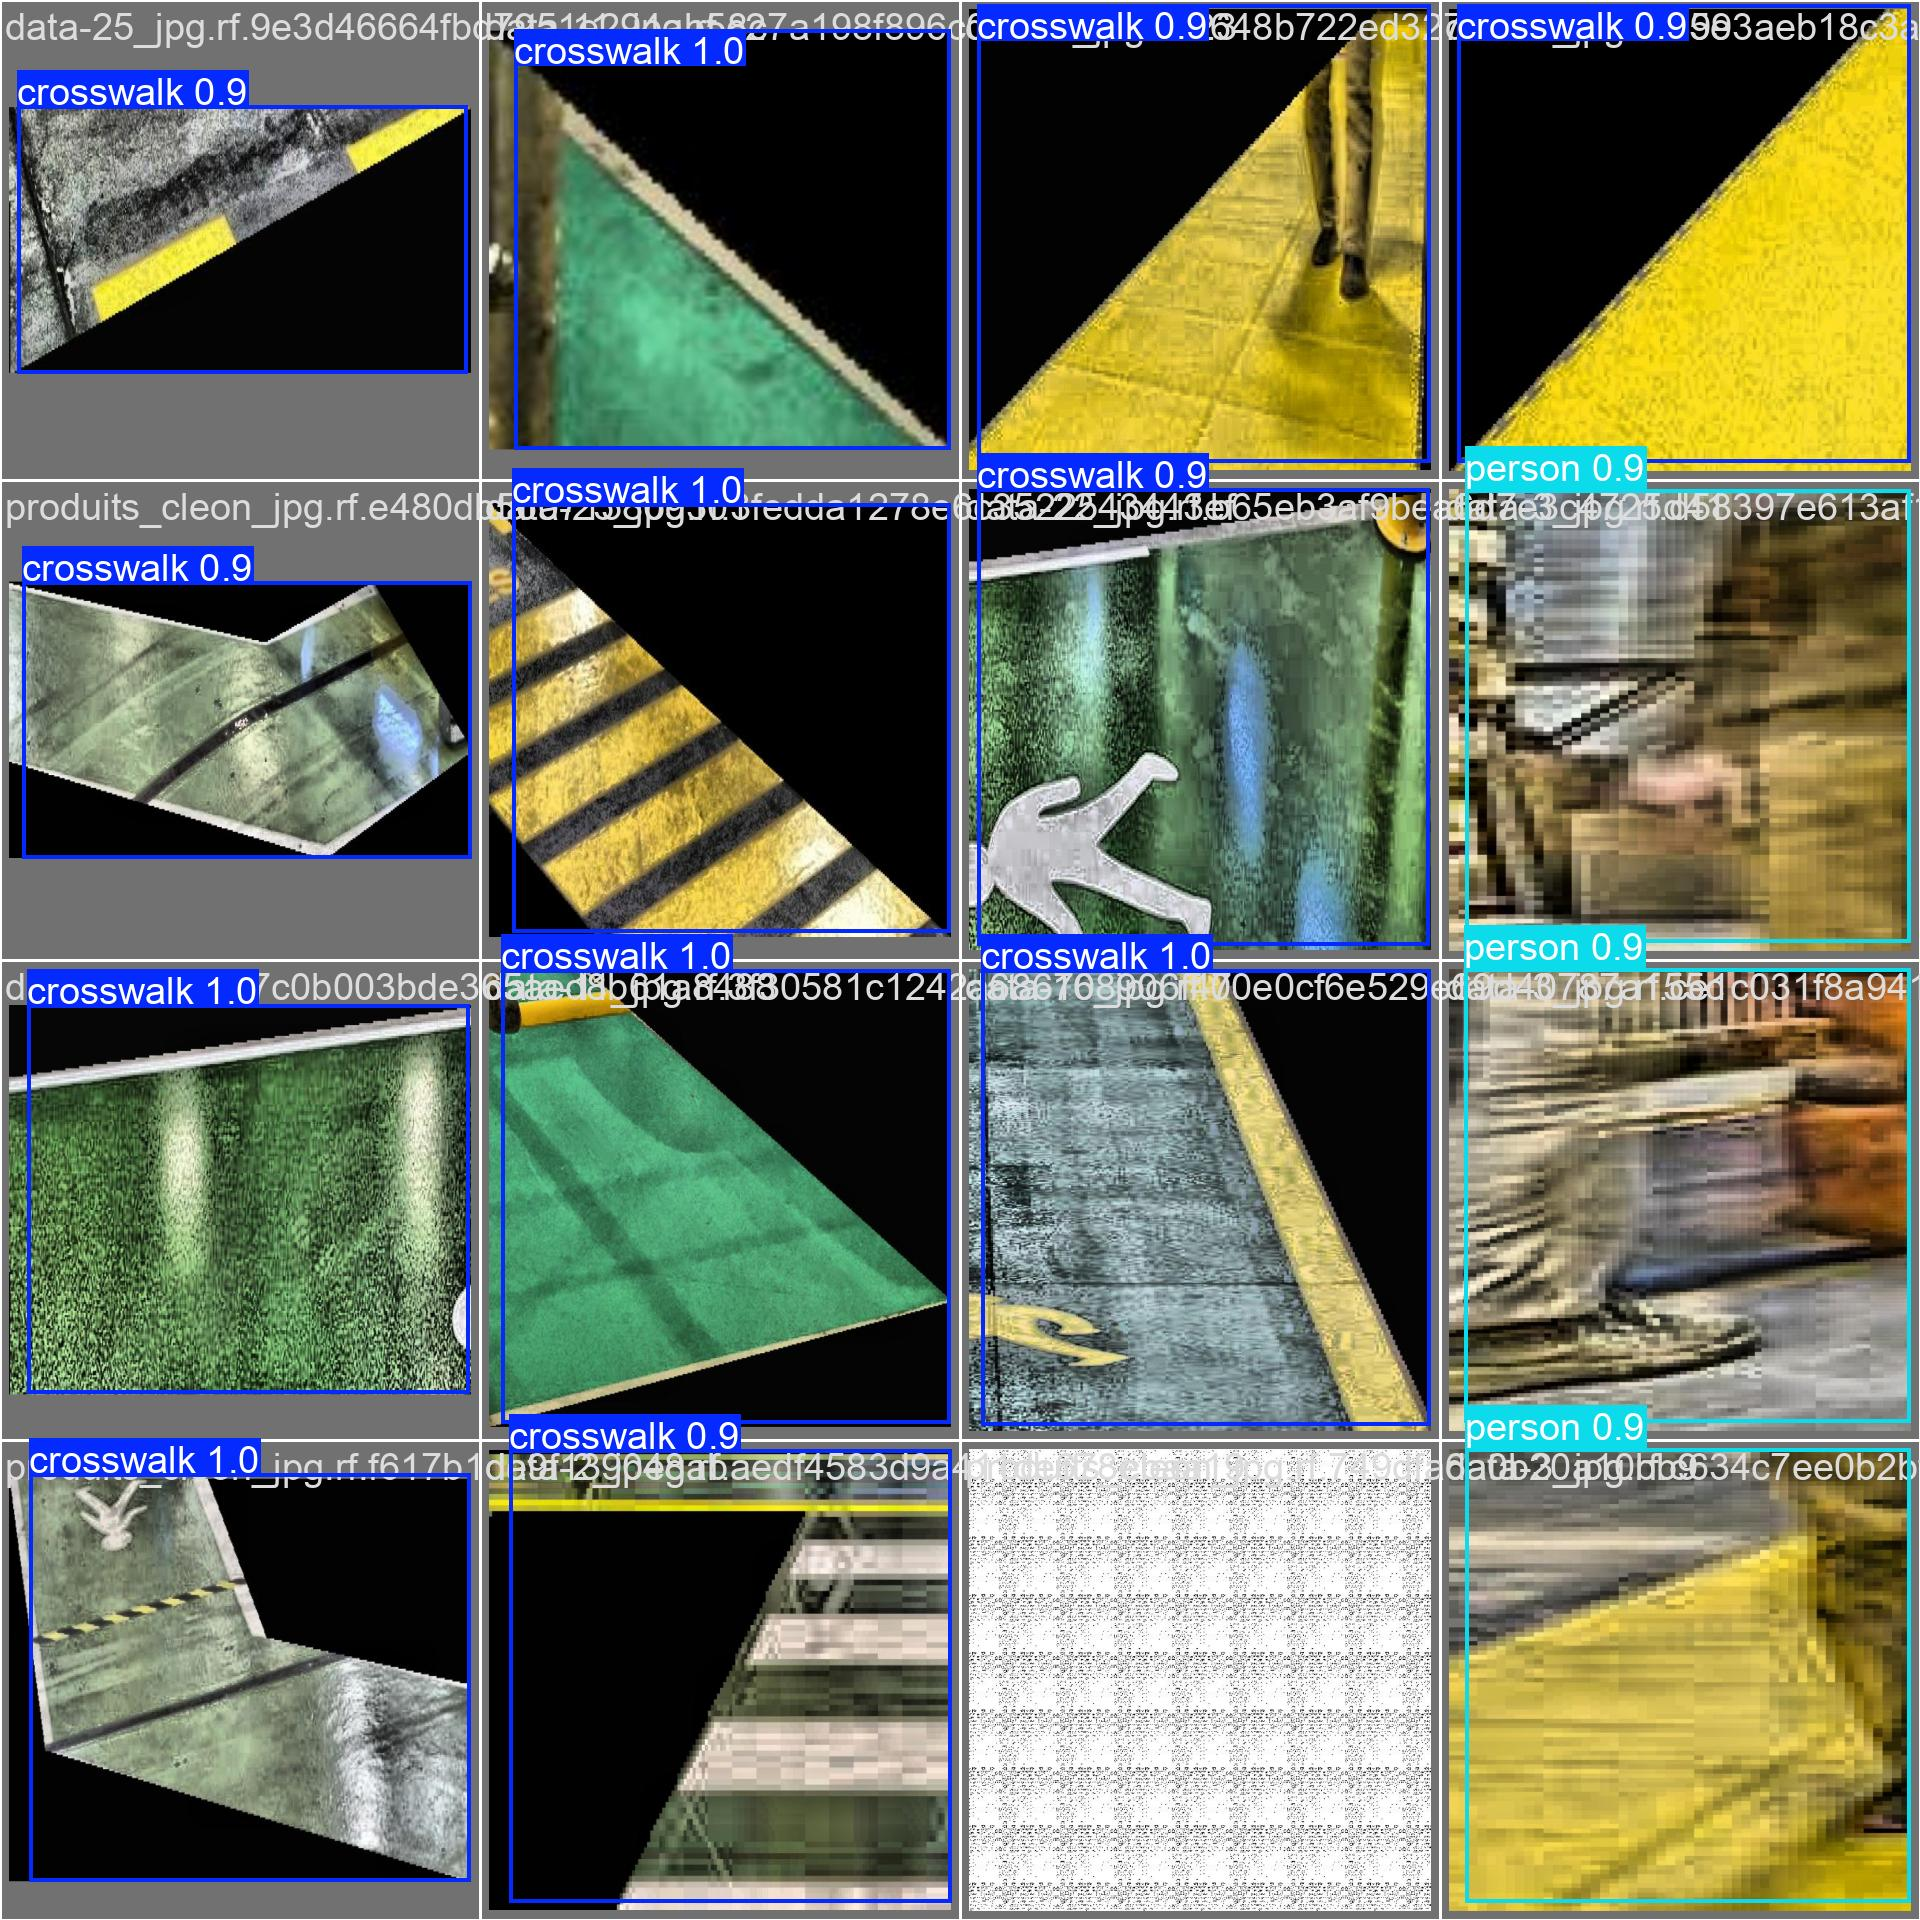

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd /content
!mkdir new_test_images

/content
mkdir: cannot create directory ‘new_test_images’: File exists


In [ ]:
%cd {HOME}

# Run inference on the new images
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source=new_test_images/ conf=0.25 save=True


/content/ultralytics
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/content/ultralytics/ultralytics/cfg/__init__.py", line 834, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/content/ultralytics/ultralytics/engine/model.py", line 565, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/content/ultralytics/ultralytics/engine/predictor.py", line 183, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(None)
  File "/content/ultralytics/ultralytics/engine/predictor.py",

In [ ]:
import glob
from IPython.display import Image, display

# Find the latest prediction folder
latest_folder = max(glob.glob(f'{HOME}/runs/detect/*'), key=os.path.getmtime)

# Display each predicted image
image_paths = glob.glob(f'{latest_folder}/*.jpg')
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
!pip cache purge


Files removed: 3031


In [ ]:
from ultralytics import YOLO
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.0/78.2 GB disk)


In [ ]:
# Run inference on the image with custom confidence and IoU thresholds
# pred = model.predict(image_path, conf=confidence_threshold, iou=iou_threshold)


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!pip install -e .


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source={image_path} conf=0.4 iou=0.3


In [ ]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

# Define the crosswalk boundaries based on your specific crosswalk area
crosswalk_x_min = 100  # Replace with the actual minimum X coordinate of the crosswalk
crosswalk_x_max = 300  # Replace with the actual maximum X coordinate of the crosswalk

# Load the trained YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Directory containing new test images
test_image_dir = '/content/new_test_images'
custom_image_paths = [os.path.join(test_image_dir, img) for img in os.listdir(test_image_dir) if img.endswith('.jpg')]

# Confidence threshold and IoU threshold for predictions
confidence_threshold = 0.4
iou_threshold = 0.3

# Check if a person deviates from the crosswalk
for image_path in custom_image_paths:
    # Run inference on the image with custom confidence and IoU thresholds
    pred = model.predict(image_path, conf=confidence_threshold, iou=iou_threshold)

    # Loop through each detection in the prediction
    for detection in pred:
        bbox = detection.box.xyxy  # Extract bounding box coordinates
        x_min = bbox[0].item()  # Left side of the bounding box
        x_max = bbox[2].item()  # Right side of the bounding box

        # Check if the person is outside the crosswalk boundaries
        if x_min < crosswalk_x_min or x_max > crosswalk_x_max:
            print(f"Person deviated from the crosswalk in image: {os.path.basename(image_path)}")
        else:
            print(f"Person is within the crosswalk in image: {os.path.basename(image_path)}")

    # Display the image for visual confirmation
    display(Image(filename=image_path, width=600))
